### <font color="magenta"> Get Data

In [23]:
import pandas as pd

time: 476 µs (started: 2021-12-08 22:23:16 -05:00)


In [24]:
import sqlite3

time: 461 µs (started: 2021-12-08 22:23:17 -05:00)


In [25]:
#billboard = pd.read_csv("../charts.csv")

#below is my path - kate
billboard = pd.read_csv("charts.csv")

time: 305 ms (started: 2021-12-08 22:23:17 -05:00)


The file charts.csv is 18.2mb with 330,087 observations.

In [26]:
billboard

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


time: 16.7 ms (started: 2021-12-08 22:23:19 -05:00)


In [27]:
#con = sqlite3.connect("../database.sqlite")
con = sqlite3.connect("database.sqlite")

# Load the data into a DataFrame
reviews_df = pd.read_sql_query("SELECT * from reviews", con)

# Select only data for 2002
#surveys2002 = surveys_df[surveys_df.year == 2002]

# Write the new DataFrame to a new SQLite table
#surveys2002.to_sql("surveys2002", con, if_exists="replace")

con.close()

time: 141 ms (started: 2021-12-08 22:23:24 -05:00)


In [28]:
reviews_df.memory_usage(index=True).sum()

1913000

time: 7.6 ms (started: 2021-12-08 22:23:25 -05:00)


The sql data is 1.92mb with 18,393 observations.

In [29]:
reviews_df

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18388,1535,let us replay!,coldcut,http://pitchfork.com/reviews/albums/1535-let-u...,8.9,0,james p. wisdom,None,1999-01-26,1,26,1,1999
18389,1341,1999,cassius,http://pitchfork.com/reviews/albums/1341-1999/,4.8,0,james p. wisdom,None,1999-01-26,1,26,1,1999
18390,5376,out of tune,mojave 3,http://pitchfork.com/reviews/albums/5376-out-o...,6.3,0,jason josephes,contributor,1999-01-12,1,12,1,1999
18391,2413,"singles breaking up, vol. 1",don caballero,http://pitchfork.com/reviews/albums/2413-singl...,7.2,0,james p. wisdom,None,1999-01-12,1,12,1,1999


time: 22.5 ms (started: 2021-12-08 22:23:27 -05:00)


### <font color="magenta"> Clean data to merge

**In this section, we applied functions lower and trip to the artist and song title columns to ensure we may match songs and artists appropriately, without missing any data**

In [30]:
billboard['artist'] = billboard['artist'].apply(str.lower)
billboard['artist'] = billboard['artist'].apply(str.strip)
reviews_df['artist'] = reviews_df['artist'].apply(str.lower)
reviews_df['artist'] = reviews_df['artist'].apply(str.strip)

time: 142 ms (started: 2021-12-08 22:23:32 -05:00)


In [31]:
billboard['song'] = billboard['song'].apply(str.lower)
billboard['song'] = billboard['song'].apply(str.strip)
reviews_df['title'] = reviews_df['title'].apply(str.lower)
reviews_df['title'] = reviews_df['title'].apply(str.strip)

time: 126 ms (started: 2021-12-08 22:23:32 -05:00)


### <font color="magenta"> Merge

**Here we performed an inner merge on the reviews_df (pitchfork data) and billboard df (billboard data). The merged dataframe is titled merge.**

In [32]:
merge = reviews_df.merge(billboard, left_on = "title", right_on="song", how="inner")
merge['artist'] = merge['artist_y']
merge = merge.drop(['artist_x', 'artist_y','title','author_type'], axis=1)

time: 108 ms (started: 2021-12-08 22:23:34 -05:00)


In [33]:
merge

,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year,date,rank,song,last-week,peak-rank,weeks-on-board,artist
0,22696,http://pitchfork.com/reviews/albums/22696-4-yo...,6.7,0,paul a. thompson,2016-12-14,2,14,12,2016,2016-12-31,29,4 your eyez only,NaN,29,1,j. cole
1,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016,1975-09-06,81,out of time,85.0,81,3,the rolling stones
2,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016,1975-08-30,85,out of time,90.0,85,2,the rolling stones
3,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016,1975-08-23,90,out of time,NaN,90,1,the rolling stones
4,19985,http://pitchfork.com/reviews/albums/19985-houn...,6.8,0,paul thompson,2014-11-26,2,26,11,2014,1975-09-06,81,out of time,85.0,81,3,the rolling stones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22974,6709,http://pitchfork.com/reviews/albums/6709-calif...,6.8,0,brent dicrescenzo,1999-06-08,1,8,6,1999,2000-07-29,72,californication,NaN,72,1,red hot chili peppers
22975,7119,http://pitchfork.com/reviews/albums/7119-dna/,8.0,0,samir khan,1999-05-04,1,4,5,1999,2017-10-28,98,dna,87.0,67,4,bts
22976,7119,http://pitchfork.com/reviews/albums/7119-dna/,8.0,0,samir khan,1999-05-04,1,4,5,1999,2017-10-21,87,dna,67.0,67,3,bts
22977,7119,http://pitchfork.com/reviews/albums/7119-dna/,8.0,0,samir khan,1999-05-04,1,4,5,1999,2017-10-14,67,dna,85.0,67,2,bts


time: 31.4 ms (started: 2021-12-08 22:23:35 -05:00)


In [34]:
merge.memory_usage(index=True).sum()

3308976

time: 7.78 ms (started: 2021-12-08 22:23:41 -05:00)


The merge data is 3.31mb with 392 observations.

### <font color="magenta"> Change column order to read easier

**To make merge more readable and easier to manipulate, we changed the order of the columns below**

In [35]:
cols = list(merge.columns.values)

time: 473 µs (started: 2021-12-08 22:24:10 -05:00)


In [36]:
cols

['reviewid',
 'url',
 'score',
 'best_new_music',
 'author',
 'pub_date',
 'pub_weekday',
 'pub_day',
 'pub_month',
 'pub_year',
 'date',
 'rank',
 'song',
 'last-week',
 'peak-rank',
 'weeks-on-board',
 'artist']

time: 3.57 ms (started: 2021-12-08 22:24:11 -05:00)


In [37]:
cols =  ['date',
 'rank',
 'song','artist',
 'last-week',
 'peak-rank',
 'weeks-on-board',
 'reviewid',
 'url',
 'score',
 'best_new_music',
 'author',
 'pub_date',
 'pub_weekday',
 'pub_day',
 'pub_month',
 'pub_year']

time: 608 µs (started: 2021-12-08 22:24:11 -05:00)


In [38]:
merge = merge[cols]

time: 5.01 ms (started: 2021-12-08 22:24:12 -05:00)


### <font color="magenta"> Drop duplicate reviews (if they have same url)

In [39]:
#merge['url'].value_counts()

#The line below shows why the same url shows up 205 times. The review is for an album called angel and the song titles are called angel
merge[merge['url']=='http://pitchfork.com/reviews/albums/19174-pure-x-angel/']

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year
7433,2013-12-28,87,angel,jacquie lee,NaN,87,1,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7434,2011-07-02,64,angel,javier colon,NaN,64,1,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7435,2011-05-14,83,angel,akon,96.0,56,10,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7436,2011-05-07,96,angel,akon,NaN,56,9,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7437,2010-12-25,83,angel,akon,56.0,56,8,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7633,1965-03-13,53,angel,johnny tillotson,60.0,53,5,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7634,1965-03-06,60,angel,johnny tillotson,66.0,60,4,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7635,1965-02-27,66,angel,johnny tillotson,82.0,66,3,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014
7636,1965-02-20,82,angel,johnny tillotson,94.0,82,2,19174,http://pitchfork.com/reviews/albums/19174-pure...,7.4,0,miles raymer,2014-04-01,1,1,4,2014


time: 29.8 ms (started: 2021-12-08 22:24:13 -05:00)


In [40]:
merge.drop_duplicates(subset=['url'],keep='last')

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,2016-12-31,29,4 your eyez only,j. cole,NaN,29,1,22696,http://pitchfork.com/reviews/albums/22696-4-yo...,6.7,0,paul a. thompson,2016-12-14,2,14,12,2016
3,1975-08-23,90,out of time,the rolling stones,NaN,90,1,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016
6,1975-08-23,90,out of time,the rolling stones,NaN,90,1,19985,http://pitchfork.com/reviews/albums/19985-houn...,6.8,0,paul thompson,2014-11-26,2,26,11,2014
47,2016-10-29,5,24k magic,bruno mars,NaN,5,1,22634,http://pitchfork.com/reviews/albums/22634-24k-...,6.2,0,katherine st. asaph,2016-12-02,4,2,12,2016
77,2016-10-08,40,starboy,the weeknd featuring daft punk,NaN,40,1,22668,http://pitchfork.com/reviews/albums/22668-star...,6.7,0,mehan jayasuriya,2016-11-30,2,30,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22913,2020-05-02,44,pick up,dababy featuring quavo,NaN,44,1,7323,http://pitchfork.com/reviews/albums/7323-pick-up/,7.6,0,s. murray,1999-09-14,1,14,9,1999
22951,1961-02-20,24,surrender,elvis presley with the jordanaires,NaN,24,1,1412,http://pitchfork.com/reviews/albums/1412-surre...,9.0,0,sarah zupko,1999-06-29,1,29,6,1999
22955,2020-11-14,92,stay down,"lil durk, 6lack & young thug",NaN,92,1,8224,http://pitchfork.com/reviews/albums/8224-stay-...,9.3,0,paul cooper,1999-06-22,1,22,6,1999
22974,2000-07-29,72,californication,red hot chili peppers,NaN,72,1,6709,http://pitchfork.com/reviews/albums/6709-calif...,6.8,0,brent dicrescenzo,1999-06-08,1,8,6,1999


time: 31.5 ms (started: 2021-12-08 22:24:20 -05:00)


### <font color="magenta"> Checking number of unique songs in merge

**The new dataframe unique has 693 rows of completely different songs (previously, a song may have appeared in multiple rows if it lived on the Billboard charts for multiple weeks or if it had multiple reviews**

In [41]:
unique = merge.drop_duplicates(subset ="song")

time: 9.33 ms (started: 2021-12-08 22:24:30 -05:00)


In [42]:
unique

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,reviewid,url,score,best_new_music,author,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,2016-12-31,29,4 your eyez only,j. cole,NaN,29,1,22696,http://pitchfork.com/reviews/albums/22696-4-yo...,6.7,0,paul a. thompson,2016-12-14,2,14,12,2016
1,1975-09-06,81,out of time,the rolling stones,85.0,81,3,22669,http://pitchfork.com/reviews/albums/22669-out-...,8.4,0,evan rytlewski,2016-12-02,4,2,12,2016
7,2017-08-05,50,24k magic,bruno mars,48.0,4,41,22634,http://pitchfork.com/reviews/albums/22634-24k-...,6.2,0,katherine st. asaph,2016-12-02,4,2,12,2016
48,2017-04-29,39,starboy,the weeknd featuring daft punk,37.0,1,30,22668,http://pitchfork.com/reviews/albums/22668-star...,6.7,0,mehan jayasuriya,2016-11-30,2,30,11,2016
78,2021-11-06,63,woman,doja cat,65.0,62,13,22644,http://pitchfork.com/reviews/albums/22644-woman/,5.2,0,mehan jayasuriya,2016-11-29,1,29,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22913,2020-05-02,44,pick up,dababy featuring quavo,NaN,44,1,7323,http://pitchfork.com/reviews/albums/7323-pick-up/,7.6,0,s. murray,1999-09-14,1,14,9,1999
22914,1991-08-10,96,surrender,trixter,84.0,72,10,1412,http://pitchfork.com/reviews/albums/1412-surre...,9.0,0,sarah zupko,1999-06-29,1,29,6,1999
22952,2021-02-13,87,stay down,"lil durk, 6lack & young thug",NaN,73,4,8224,http://pitchfork.com/reviews/albums/8224-stay-...,9.3,0,paul cooper,1999-06-22,1,22,6,1999
22956,2000-12-02,97,californication,red hot chili peppers,89.0,69,19,6709,http://pitchfork.com/reviews/albums/6709-calif...,6.8,0,brent dicrescenzo,1999-06-08,1,8,6,1999


time: 28.2 ms (started: 2021-12-08 22:24:31 -05:00)


In [44]:
unique.memory_usage(index=True).sum()

100944

time: 9.56 ms (started: 2021-12-08 22:25:17 -05:00)


The sql unique data is 0.10mb with 701 observations.

### <font color="magenta"> Starting to look at scores by song

**Here we performed a groupby on the database merge (with duplicates of songs), in order to see the number of times a song recieved reviews on Pitchfork and what it's average score was**

In [45]:
groups = merge.groupby("song")

time: 674 µs (started: 2021-12-08 22:25:20 -05:00)


In [46]:
groups["score"].value_counts()

song                score
#1                  4.9      20
1-2-3               6.1      39
18                  2.6       1
19                  7.9      14
1999                4.8      30
                             ..
you should be here  7.4      20
young americans     8.7      11
young forever       3.4      25
youth               4.9      20
yuck                8.1       1
Name: score, Length: 853, dtype: int64

time: 44.7 ms (started: 2021-12-08 22:25:22 -05:00)


### <font color="magenta"> Data frame of songs that have reviews but have not been on the Billboard "Top 100"

**By creating this dataframe, nottop, we may analyze the average review score for songs that were not popular enough to make it to Billboard's Top 100 list**

In [47]:
nottop = reviews_df[~reviews_df['title'].isin(billboard['song'])]

time: 32.9 ms (started: 2021-12-08 22:25:25 -05:00)


In [48]:
nottop = nottop.drop_duplicates(subset=['url'],keep='last')

time: 14.4 ms (started: 2021-12-08 22:25:26 -05:00)


In [49]:
nottop

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18387,6372,cd 2,pole,http://pitchfork.com/reviews/albums/6372-cd-2/,7.2,0,mark richard-san,None,1999-02-01,0,1,2,1999
18388,1535,let us replay!,coldcut,http://pitchfork.com/reviews/albums/1535-let-u...,8.9,0,james p. wisdom,None,1999-01-26,1,26,1,1999
18390,5376,out of tune,mojave 3,http://pitchfork.com/reviews/albums/5376-out-o...,6.3,0,jason josephes,contributor,1999-01-12,1,12,1,1999
18391,2413,"singles breaking up, vol. 1",don caballero,http://pitchfork.com/reviews/albums/2413-singl...,7.2,0,james p. wisdom,None,1999-01-12,1,12,1,1999


time: 24.4 ms (started: 2021-12-08 22:25:31 -05:00)


In [50]:
nottop.memory_usage(index=True).sum()

1963136

time: 4.5 ms (started: 2021-12-08 22:25:38 -05:00)


The nottop data is 1.97mb with 17,528 observations.

In [52]:
group = nottop.groupby("title")

time: 544 µs (started: 2021-12-08 22:26:12 -05:00)


In [53]:
group["score"].value_counts()

title             score
                  5.0      1
                  8.4      1
"cassette" ep     7.8      1
"couples"         5.8      1
"evidence" 12"    7.6      1
                          ..
zummo with an x   8.0      1
zwei              7.3      1
zwei photonen ep  8.0      1
zweite meer       6.9      1
{awayland}        5.5      1
Name: score, Length: 17494, dtype: int64

time: 43.2 ms (started: 2021-12-08 22:26:13 -05:00)


### <font color="magenta"> Starting the graphs

**Our first visual is a scatter plot comparing the average review score of songs both on the Billboard chart and not on the Billboard chart(from Pitchfork) and their peak-rank, as taken from Billbaord data**

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

time: 928 ms (started: 2021-12-08 22:26:40 -05:00)


In [55]:
rating_top = unique.score.to_list()
rating_nottop = nottop.score.to_list()

time: 1.69 ms (started: 2021-12-08 22:26:41 -05:00)


In [56]:
billboard_rank = unique['peak-rank'].to_list()

time: 495 µs (started: 2021-12-08 22:26:41 -05:00)


In [57]:
title_top = unique.song.to_list()
title_nottop = nottop.title.to_list()

time: 812 µs (started: 2021-12-08 22:26:42 -05:00)


In [58]:
not_score = nottop.score.to_list()

time: 950 µs (started: 2021-12-08 22:26:42 -05:00)


In [59]:
not_id = nottop.reviewid.to_list()

time: 1.14 ms (started: 2021-12-08 22:26:43 -05:00)


In [60]:
unique.score.mean()

6.968188302425108

time: 6.72 ms (started: 2021-12-08 22:26:43 -05:00)


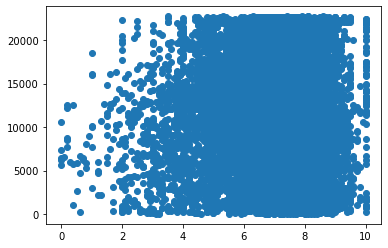

time: 324 ms (started: 2021-12-08 22:26:43 -05:00)


In [61]:
plt.scatter(x= not_score, y = not_id)
#plt.xlabel('Average Pitchfork Score')
#plt.ylabel('Billboard Peak Rank')

Text(0, 0.5, 'Billboard Peak Rank')

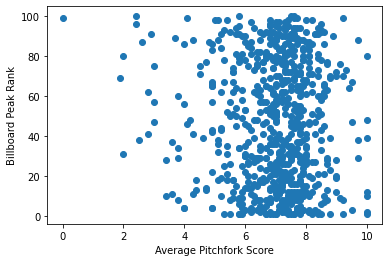

time: 175 ms (started: 2021-12-08 22:26:44 -05:00)


In [62]:
plt.scatter(x= rating_top, y = billboard_rank)
plt.xlabel('Average Pitchfork Score')
plt.ylabel('Billboard Peak Rank')

### <font color="magenta"> the majority of billboard hot 100 songs are rank at 6.97 with no apparent positive or negative trend between rating and location on the billboard hot 100

### <font color="magenta"> Second visualization

**Our secondary goal is to compare song review sentiment scores from songs on “The Hot 100” list using a histogram. The histogram would have the sentiment score on the x-axis from positive to negative. This would be interesting to see if popular songs are reviewed more positively or if the reviews are polarized.**

In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import requests
import json

time: 3.47 s (started: 2021-12-08 22:26:48 -05:00)


In [64]:
sid = SentimentIntensityAnalyzer()

time: 39.5 ms (started: 2021-12-08 22:26:52 -05:00)


In [65]:
def scrape_review_text(url):
    response = requests.get(url)
    #response_dict = json.loads(response.text)
    soup = BeautifulSoup(response.text)
    paragraph = soup.find('meta', { 'name': "description" })
    return str(paragraph)
trial = scrape_review_text('http://pitchfork.com/reviews/albums/22669-out-of-time/')

time: 1.18 s (started: 2021-12-08 22:26:52 -05:00)


In [66]:
trial

'<meta content="Along with Nevermind, released a half year later, R.E.M.’s\xa0Out of Time\xa0was the early-’90s major-label ideal: A\xa0blockbuster that multiplied the band’s following without losing existing fans." data-react-helmet="true" name="description" property="description"/>'

time: 4.97 ms (started: 2021-12-08 22:26:53 -05:00)


In [67]:
sampled_on_billboard = unique['url'].sample(100)
sampled_not_billboard = nottop['url'].sample(100)

time: 6.81 ms (started: 2021-12-08 22:26:53 -05:00)


### <font color="magenta"> Most computationally expensive function below

To make this less computationally expensive, we sampled the dataframes to only get 100 rows from each. We sampled instead of using all the songs because pulling the article body from the url and storing it in our dataframe too much time and space. 

In [68]:
billboard_article_bodies = sampled_on_billboard.apply(scrape_review_text)
not_article_bodies = sampled_not_billboard.apply(scrape_review_text)

time: 2min 13s (started: 2021-12-08 22:26:58 -05:00)


In [69]:
def apply_sentiment(column):
    ss = sid.polarity_scores(column)
    return ss

time: 619 µs (started: 2021-12-08 22:29:39 -05:00)


In [70]:
def apply_compound(column):
    return column['compound']
def apply_negative(column):
    return column['neg']
def apply_pos(column):
    return column['pos']

time: 697 µs (started: 2021-12-08 22:29:39 -05:00)


In [71]:
#making the article body dataframes (not on billboard)
not_article_body_df = pd.DataFrame(not_article_bodies)
not_article_body_df = not_article_body_df.rename(columns = {'url':'body'})
not_article_body_df['url'] = sampled_not_billboard
not_article_body_df['sentiment'] = not_article_body_df['body'].apply(apply_sentiment)
not_article_body_df['compound'] = not_article_body_df['sentiment'].apply(apply_compound)


time: 52.3 ms (started: 2021-12-08 22:29:40 -05:00)


In [72]:
#making the article body dataframes (on billboard)
article_body_df = pd.DataFrame(billboard_article_bodies)
article_body_df = article_body_df.rename(columns = {'url':'body'})
article_body_df['url'] = sampled_on_billboard

time: 3.79 ms (started: 2021-12-08 22:29:42 -05:00)


In [83]:
article_body_df

,body,url,sentiment,compound,negative,peak-rank,weeks-on-board
282,"<meta content=""Redemption concludes Dawn Richa...",http://pitchfork.com/reviews/albums/22648-rede...,"{'neg': 0.139, 'neu': 0.861, 'pos': 0.0, 'comp...",-0.4939,0.139,61.0,3.0
19627,"<meta content=""Unpretentious Midwestern blues-...",http://pitchfork.com/reviews/albums/9316-all-t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,NaN,NaN
7771,"<meta content=""Mess is the first Liars album t...",http://pitchfork.com/reviews/albums/19121-liar...,"{'neg': 0.089, 'neu': 0.833, 'pos': 0.078, 'co...",-0.1027,0.089,74.0,1.0
19124,"<meta content=""Underground supergroup featurin...",http://pitchfork.com/reviews/albums/10361-anon...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,NaN,NaN
17197,"<meta content=""After a 17-year wait, Chinese D...",http://pitchfork.com/reviews/albums/12469-chin...,"{'neg': 0.163, 'neu': 0.722, 'pos': 0.115, 'co...",-0.4527,0.163,NaN,NaN
...,...,...,...,...,...,...,...
4669,"<meta content=""Graham Walsh and Julie Fader, t...",http://pitchfork.com/reviews/albums/20361-remi...,"{'neg': 0.104, 'neu': 0.778, 'pos': 0.118, 'co...",0.2382,0.104,57.0,20.0
15623,<meta content='Woodsist presents the first ful...,http://pitchfork.com/reviews/albums/14117-escape/,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,NaN,NaN
15748,"<meta content=""Backpacker latecomers shift to ...",http://pitchfork.com/reviews/albums/13994-land...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,NaN,NaN
16818,"<meta content=""Fat Possum reissues three recor...",http://pitchfork.com/reviews/albums/12927-lets...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,NaN,NaN


time: 24 ms (started: 2021-12-08 22:38:07 -05:00)


In [84]:
not_article_body_df

,body,url,sentiment,compound
5972,"<meta content=""Analog Africa's first foray int...",http://pitchfork.com/reviews/albums/16109-bamb...,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.4588
11444,"<meta content=""Jesus and Mary Chain's Jim and ...",http://pitchfork.com/reviews/albums/10163-litt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
14201,"<meta content=""Barsuk's other &quot;O.C.&quot;...",http://pitchfork.com/reviews/albums/465-i-sold...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
11144,"<meta content=""A fixture in Berlin's undergrou...",http://pitchfork.com/reviews/albums/10478-i-pu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
9227,"<meta content=""Ferocious and brave, this debut...",http://pitchfork.com/reviews/albums/12786-bird...,"{'neg': 0.069, 'neu': 0.649, 'pos': 0.282, 'co...",0.6808
...,...,...,...,...
16818,"<meta content=""What the hell happened to these...",http://pitchfork.com/reviews/albums/5774-winte...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.6808
2791,"<meta content=""Ohio power-pop outfit Connectio...",http://pitchfork.com/reviews/albums/19691-conn...,"{'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'comp...",0.0772
2978,"<meta content=""Matteah Baim's first solo album...",http://pitchfork.com/reviews/albums/19474-matt...,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...",0.4404
14867,"<meta content=""Exciting though it may be, the ...",http://pitchfork.com/reviews/albums/1114-fire-...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


time: 17.2 ms (started: 2021-12-08 22:38:17 -05:00)


In [81]:
article_body_df.memory_usage(index=True).sum()

6400

time: 3.9 ms (started: 2021-12-08 22:37:38 -05:00)


The top article body data is 0.0064mb with 100 observations.

In [82]:
not_article_body_df.memory_usage(index=True).sum()

4000

time: 3.96 ms (started: 2021-12-08 22:37:39 -05:00)


The not top article data is 0.004mb with 100 observations.

In [73]:
#billboard dataframe cont.
article_body_df['sentiment'] = article_body_df['body'].apply(apply_sentiment)
article_body_df['compound'] = article_body_df['sentiment'].apply(apply_compound)
article_body_df['negative'] = article_body_df['sentiment'].apply(apply_negative)
article_body_df['peak-rank'] = unique['peak-rank'].iloc[0:300]
article_body_df['weeks-on-board'] = unique['weeks-on-board'].iloc[0:300]

time: 62.7 ms (started: 2021-12-08 22:29:42 -05:00)


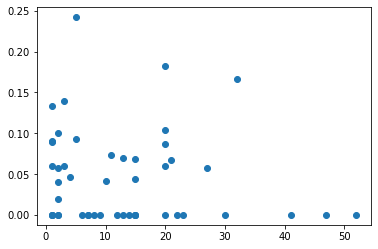

time: 171 ms (started: 2021-12-08 22:29:43 -05:00)


In [74]:
#scatterplot of weeks on board and how negative the review was
plt.scatter(x= article_body_df['weeks-on-board'],y= article_body_df['negative'])

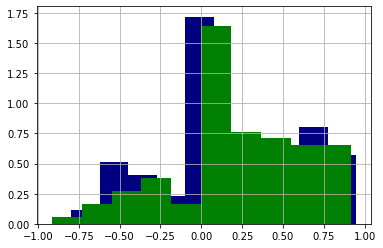

time: 209 ms (started: 2021-12-08 22:29:52 -05:00)


In [75]:
#histogram comparing the seniment analysis of songs on billboard and songs not
on_100 = article_body_df['compound'].hist(density=True, color = 'navy')
not_100 = not_article_body_df['compound'].hist(density=True, color = 'green')


**third visual trial hisogram**

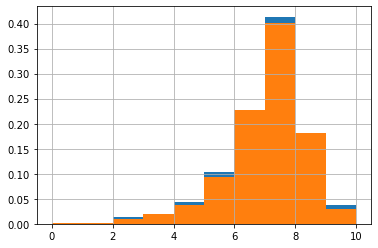

time: 246 ms (started: 2021-12-08 22:29:54 -05:00)


In [76]:
#comparing scores
u = unique['score'].hist(density=True)
n = nottop['score'].hist(density=True)

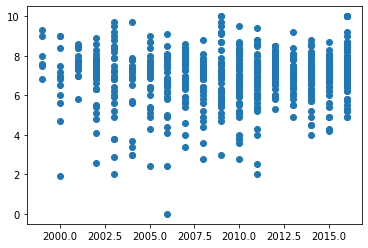

time: 160 ms (started: 2021-12-08 22:29:56 -05:00)


In [77]:
#unique['score'].hist(density=True)
plt.scatter(x= unique['pub_year'],y= unique['score'])

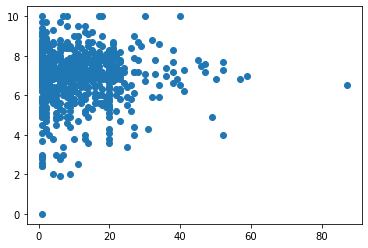

time: 143 ms (started: 2021-12-08 22:29:58 -05:00)


In [78]:
plt.scatter(x= unique['weeks-on-board'],y= unique['score'])
#billboard

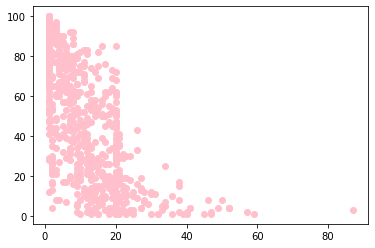

time: 137 ms (started: 2021-12-08 22:30:17 -05:00)


In [80]:
plt.scatter(x= unique['weeks-on-board'],y= unique['peak-rank'],color = 'pink')
